## Part 1: Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras import layers

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [2]:
# Determine the number of unique values in each column.
attrition_df.nunique()

Age                         43
Attrition                    2
BusinessTravel               3
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EnvironmentSatisfaction      4
HourlyRate                  71
JobInvolvement               4
JobLevel                     5
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
NumCompaniesWorked          10
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
RelationshipSatisfaction     4
StockOptionLevel             4
TotalWorkingYears           40
TrainingTimesLastYear        7
WorkLifeBalance              4
YearsAtCompany              37
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        18
dtype: int64

In [3]:
# Create y_df with the Attrition and Department columns
y_df = attrition_df[["Attrition", "Department"]]
y_df


,Attrition,Department
0,Yes,Sales
1,No,Research & Development
2,Yes,Research & Development
3,No,Research & Development
4,No,Research & Development
...,...,...
1465,No,Research & Development
1466,No,Research & Development
1467,No,Research & Development
1468,No,Sales


In [4]:
# Create a list of at least 10 column names to use as X data
list_x = ["Education",
         "Age",
           "TotalWorkingYears",
             "JobSatisfaction",
               "HourlyRate",
                 "StockOptionLevel",
                   "WorkLifeBalance",
                     "YearsAtCompany",
                       "EnvironmentSatisfaction",
                         "RelationshipSatisfaction"]

# Create X_df using your selected columns
X_df = attrition_df[list_x]

# Show the data types for X_df
X_df.dtypes


Education                   int64
Age                         int64
TotalWorkingYears           int64
JobSatisfaction             int64
HourlyRate                  int64
StockOptionLevel            int64
WorkLifeBalance             int64
YearsAtCompany              int64
EnvironmentSatisfaction     int64
RelationshipSatisfaction    int64
dtype: object

In [5]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split



In [6]:
# Convert your X data to numeric data types however you see fit
# Add new code cells as necessary
OverTime_counts = pd.Series([788, 314], index=['No', 'Yes'], name='OverTime')

# Replace 'No' with 0 and 'Yes' with 1
OverTime_numeric = OverTime_counts.replace({'No': 0, 'Yes': 1})

# Assign the name and dtype back to the Series
OverTime_numeric.name = 'OverTime'
OverTime_numeric = OverTime_numeric.astype('int64')

# Display the result
print(OverTime_numeric)

No     788
Yes    314
Name: OverTime, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, random_state=1)

In [8]:
# Convert your X data to numeric data types however you see fit, int64 is the dtype
X_train = X_train.astype('int64')
X_test = X_test.astype('int64')

#Add new code cells as necessary
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1102, 10) (368, 10) (1102, 2) (368, 2)


In [9]:
# Create a StandardScaler
scaler = StandardScaler()


# Fit the StandardScaler to the training data
X_scaler = scaler.fit(X_train)


# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [10]:
from sklearn.preprocessing import OneHotEncoder


In [11]:
# Create a OneHotEncoder for the Department column
department_encoder = OneHotEncoder(sparse_output=False)


# Fit the encoder to the training data
department_encoder.fit(y_train[['Department']])


# Create two new variables by applying the encoder
# to the training and testing data
y_train_department = department_encoder.transform(y_train[['Department']])
y_test_department = department_encoder.transform(y_test[['Department']])




In [12]:
# Create a OneHotEncoder for the Attrition column
attrition_encoder = OneHotEncoder(sparse_output=False)


# Fit the encoder to the training data
attrition_encoder.fit(y_train[['Attrition']])


# Create two new variables by applying the encoder
# to the training and testing data
y_train_attrition = attrition_encoder.transform(y_train[['Attrition']])
y_test_attrition = attrition_encoder.transform(y_test[['Attrition']])


## Create, Compile, and Train the Model

In [13]:
# Find the number of columns in the X training data
num_columns = X_train.shape[1]
print("Number of columns in the X training data: ", num_columns)

# Create the input layer
input_layer = layers.Input(shape=(10,), name='input')


# Create at least two shared layers
shared_layer1 = layers.Dense(64, activation='relu', name='shared1')(input_layer)
shared_layer2 = layers.Dense(128, activation='relu', name='shared2')(shared_layer1)


Number of columns in the X training data:  10



In [14]:
# Create a branch for Department
# with a hidden layer and an output layer

# Create the hidden layer
department_hidden = layers.Dense(32, activation='relu', name='department_hidden')(shared_layer2)


# Create the output layer
num_unique_departments = len(y_train['Department'].unique())
department_output = layers.Dense(num_unique_departments, activation='softmax', name='department_output')(department_hidden)


In [15]:
# Create a branch for Attrition
# with a hidden layer and an output layer

# Create the hidden layer
attrition_hidden = layers.Dense(32, activation='relu', name='attrition_hidden')(shared_layer2)


# Create the output layer
num_unique_attritions = len(y_train['Attrition'].unique())
attrition_output = layers.Dense(num_unique_attritions, activation='sigmoid', name='attrition_output')(attrition_hidden)


In [16]:
# Create the model
model = Model(inputs=input_layer, outputs=[department_output, attrition_output])


# Compile the model
model.compile(optimizer='adam',
              loss={'department_output': 'categorical_crossentropy', 'attrition_output': 'categorical_crossentropy'},
              metrics={'department_output': 'accuracy', 'attrition_output': 'accuracy'})

# Summarize the model
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 10)]                 0         []                            
                                                                                                  
 shared1 (Dense)             (None, 64)                   704       ['input[0][0]']               
                                                                                                  
 shared2 (Dense)             (None, 128)                  8320      ['shared1[0][0]']             
                                                                                                  
 department_hidden (Dense)   (None, 32)                   4128      ['shared2[0][0]']             
                                                                                             

In [17]:
# Train the model
model.fit(
    X_train_scaled,
    {'department_output': y_train_department, 'attrition_output': y_train_attrition},
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10


28/28 [==============================] - 1s 10ms/step - loss: 1.3876 - department_output_loss: 0.9097 - attrition_output_loss: 0.4779 - department_output_accuracy: 0.5925 - attrition_output_accuracy: 0.8400 - val_loss: 1.3648 - val_department_output_loss: 0.8722 - val_attrition_output_loss: 0.4927 - val_department_output_accuracy: 0.6335 - val_attrition_output_accuracy: 0.8281
Epoch 2/10
28/28 [==============================] - 0s 2ms/step - loss: 1.1840 - department_output_loss: 0.7755 - attrition_output_loss: 0.4084 - department_output_accuracy: 0.6640 - attrition_output_accuracy: 0.8513 - val_loss: 1.3324 - val_department_output_loss: 0.8622 - val_attrition_output_loss: 0.4702 - val_department_output_accuracy: 0.6335 - val_attrition_output_accuracy: 0.8281
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - loss: 1.1569 - department_output_loss: 0.7584 - attrition_output_loss: 0.3985 - department_output_accuracy: 0.6640 - attrition_output_accuracy: 0.8513 

In [18]:
# Evaluate the model with the testing data
results = model.evaluate(X_test_scaled, {'department_output': y_test_department, 'attrition_output': y_test_attrition})

print("Test loss, Test accuracy:", results)

12/12 [==============================] - 0s 1ms/step - loss: 1.2617 - department_output_loss: 0.7939 - attrition_output_loss: 0.4678 - department_output_accuracy: 0.6304 - attrition_output_accuracy: 0.8098
Test loss, Test accuracy: [1.2617169618606567, 0.793900191783905, 0.46781665086746216, 0.6304348111152649, 0.8097826242446899]


In [19]:
# Print the accuracy for both department and attrition
print(f"Department Accuracy: {results[3]}")
print(f"Attrition Accuracy: {results[4]}")

Department Accuracy: 0.6304348111152649
Attrition Accuracy: 0.8097826242446899


# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

In [20]:
# Summary of the 'Attrition' column
attrition_summary = attrition_df['Attrition'].value_counts()
print("Attrition summary:\n", attrition_summary)

# Summary of the 'Department' column
department_summary = attrition_df['Department'].value_counts()
print("\nDepartment summary:\n", department_summary)

Attrition summary:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64

Department summary:
 Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


Attrition summary:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64

Department summary:
 Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


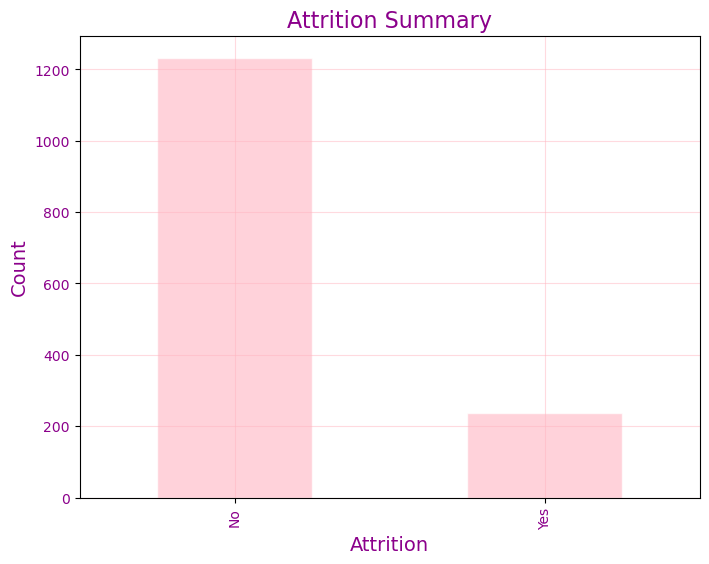

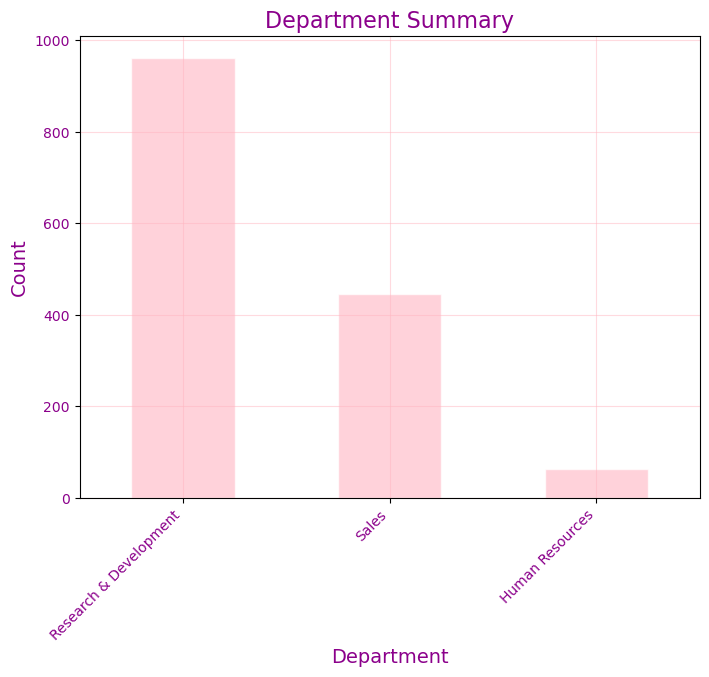

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (assuming it's called attrition_df)
# attrition_df = pd.read_csv('your_data_file.csv')

# Summary of the 'Attrition' column
attrition_summary = attrition_df['Attrition'].value_counts()
print("Attrition summary:\n", attrition_summary)

# Summary of the 'Department' column
department_summary = attrition_df['Department'].value_counts()
print("\nDepartment summary:\n", department_summary)

# Plotting Attrition Summary
plt.figure(figsize=(8, 6))
attrition_summary.plot(kind='bar', color='pink', edgecolor='white', alpha=0.7)
plt.title('Attrition Summary', fontsize=16, color='darkmagenta')
plt.xlabel('Attrition', fontsize=14, color='darkmagenta')
plt.ylabel('Count', fontsize=14, color='darkmagenta')
plt.xticks(color='darkmagenta')
plt.yticks(color='darkmagenta')
plt.grid(True, color='lightpink', alpha=0.5)
plt.show()

# Plotting Department Summary
plt.figure(figsize=(8, 6))
department_summary.plot(kind='bar', color='pink', edgecolor='white', alpha=0.7)
plt.title('Department Summary', fontsize=16, color='darkmagenta')
plt.xlabel('Department', fontsize=14, color='darkmagenta')
plt.ylabel('Count', fontsize=14, color='darkmagenta')
plt.xticks(rotation=45, ha='right', color='darkmagenta')
plt.yticks(color='darkmagenta')
plt.grid(True, color='lightpink', alpha=0.5)
plt.show()


YOUR ANSWERS HERE

1. Is accuracy the best metric to use on this data? Why or why not?

Accuracy may not be the best metric to use, especially if the data is imbalanced. In this case, there are significantly more instances of 'No' for attrition compared to 'Yes', and the distribution of employees across different departments is also uneven. Using accuracy alone might not reflect the model's performance accurately. Implementing weighted accuracy or other metrics like precision, recall, or F1-score could provide a more comprehensive evaluation.

2. What activation functions did you choose for your output layers, and why?

Softmax was used for the Department output layer because it's a multi-class classification problem with multiple categories. Sigmoid was chosen for the Attrition output layer because it's a binary classification problem with two classes ('Yes' or 'No').

3. Hey there! So, this model we're working with definitely has some potential for upgrades in a few different areas. First off, let's talk layers. Right now, our neural network is pretty simple, with just a few layers. But what if we jazzed it up by adding more layers and cranking up the epochs? Yeah, it might mean a bit more time spent training ⏳, but think about it – a more complex model could totally nail those predictions! And hey, let's not forget about variables. The data we're using only taps into like 10 columns right now, but imagine if we threw in more or even all of 'em? That could seriously level up our model's performance! Oh, and speaking of data, there's only about 1470 employees in our dataset. But imagine if we gathered more data! It could give our model way more to learn from and make it super accurate! 🌟